<a href="https://colab.research.google.com/github/MichalDataSc/data_analytics/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

---



In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Wczytanie danych z airbnb dla Barcelony

Będziemy korzystać z biblioteki pandas.
Nazwa pochodzi od “panel data” — pojęcia z ekonomii związanego z analizą danych obserwacyjnych.

Pandas daje nam:



*   struktury danych zaprojektowane do analizy: Series i DataFrame
*   łatwe wczytywanie danych
*   intuicyjne filtrowanie, grupowanie, czyszczenie, transformacje
*   możliwość pracy z danymi jak w Excelu, ale z mocą pełnego języka programowania

czyli dokładnie to, czego nam potrzeba.
Obejrzyjmy najpierw kilka listingów oraz arkusz z danymi.



In [2]:
url = "https://data.insideairbnb.com/spain/catalonia/barcelona/2025-09-14/data/listings.csv.gz"
df = pd.read_csv(url)

df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20250914152803,2025-09-15,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.62,4.82,4.32,ESFCTU000008058000039706000000000000000HUTB-00...,t,26,26,0,0,0.34
1,23197,https://www.airbnb.com/rooms/23197,20250914152803,2025-09-14,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,"Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,...,4.99,4.66,4.68,ESFCTU000008106000547162000000000000000000HUTB...,f,1,1,0,0,0.52
2,32711,https://www.airbnb.com/rooms/32711,20250914152803,2025-09-15,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,...,4.89,4.89,4.47,HUTB-001722,f,2,2,0,0,0.88
3,34241,https://www.airbnb.com/rooms/34241,20250914152803,2025-09-15,city scrape,Stylish Top Floor Apartment - Ramblas Plaza Real,Located in close proximity to Plaza Real and L...,NaN,https://a0.muscache.com/pictures/2437facc-2fe7...,73163,...,4.68,4.73,4.23,Exempt,f,3,3,0,0,0.14
4,34981,https://www.airbnb.com/rooms/34981,20250914152803,2025-09-15,city scrape,VIDRE HOME PLAZA REAL on LAS RAMBLAS,Spacious apartment for large families or group...,"Located in Ciutat Vella in the Gothic Quarter,...",https://a0.muscache.com/pictures/c4d1723c-e479...,73163,...,4.72,4.65,4.46,ESFCTU000008119000093652000000000000000HUTB-00...,f,3,3,0,0,1.49


## Podstawowe operacje w pandas na dataframe

### Head, describe, info

## df.info()

Opis struktury i typów danych - liczba kolumn, wierszy, typy danych, ile wartości nie jest puste, pamięć

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19410 entries, 0 to 19409
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19410 non-null  int64  
 1   listing_url                                   19410 non-null  object 
 2   scrape_id                                     19410 non-null  int64  
 3   last_scraped                                  19410 non-null  object 
 4   source                                        19410 non-null  object 
 5   name                                          19410 non-null  object 
 6   description                                   18673 non-null  object 
 7   neighborhood_overview                         8986 non-null   object 
 8   picture_url                                   19410 non-null  object 
 9   host_id                                       19410 non-null 

## df.describe()

statystyczne podsumowanie danych

Dla zmiennych numerycznych:

*   count
*   mean
*   std
*   min, max
*   percentyle

Dla kategorycznych
*   count (niepustych)
*   nunique
*   top (moda)
*   freq (jej częstość)



In [ ]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.941000e+04,1.941000e+04,1.941000e+04,19405.000000,19405.000000,19410.000000,19410.000000,19410.000000,15298.000000,17446.000000,...,14419.000000,14417.000000,14420.000000,14418.000000,14418.000000,19410.000000,19410.000000,19410.000000,19410.000000,14421.000000
mean,6.210978e+17,2.025091e+13,2.116496e+08,83.327648,110.233600,41.392248,2.166968,3.406079,1.429958,1.855784,...,4.612500,4.711266,4.707282,4.746362,4.450876,61.671716,44.467336,17.068830,0.097063,1.492801
std,5.893311e+17,5.879058e+00,2.147334e+08,178.410903,224.294018,0.014031,0.017689,2.324706,0.822785,1.376608,...,0.520479,0.495905,0.517222,0.397999,0.581650,122.900150,108.333156,67.119687,0.710256,2.213720
min,1.867400e+04,2.025091e+13,3.073000e+03,1.000000,1.000000,41.351783,2.085593,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.048967e+07,2.025091e+13,1.343129e+07,2.000000,3.000000,41.381170,2.156510,2.000000,1.000000,1.000000,...,4.500000,4.670000,4.670000,4.680000,4.320000,2.000000,0.000000,0.000000,0.000000,0.210000
50%,7.056056e+17,2.025091e+13,1.390639e+08,9.000000,13.000000,41.390054,2.167765,3.000000,1.000000,1.000000,...,4.750000,4.860000,4.860000,4.850000,4.570000,7.000000,3.000000,0.000000,0.000000,0.820000
75%,1.181663e+18,2.025091e+13,3.678971e+08,47.000000,78.000000,41.401569,2.177668,4.000000,2.000000,2.000000,...,4.940000,5.000000,5.000000,5.000000,4.780000,40.000000,23.000000,2.000000,0.000000,2.220000
max,1.509435e+18,2.025091e+13,7.186126e+08,994.000000,2706.000000,41.462243,2.221830,16.000000,14.000000,29.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,514.000000,514.000000,417.000000,12.000000,94.770000


In [ ]:
df.describe(include='object')

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,19410,19410,19410,19410,18673,8986,19410,19410,19405,19405,...,19410,19399,19410,15276,18346,19410,14421,14421,13930,19410
unique,19410,2,2,18531,15546,6103,19142,6620,3229,3518,...,4,38,16323,772,1,2,3805,1837,7534,2
top,https://www.airbnb.com/rooms/1509434856649686912,2025-09-15,city scrape,Habitación en Barcelona,Our mission is to empower individuals to immer...,A modernist treasure trove full of elaborate a...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/346367515,Ukio,2020-05-15,...,Entire home/apt,1 bath,"[""Heating"", ""Self check-in"", ""Cooking basics"",...",$60.00,t,2025-09-15,2025-08-17,2025-08-31,Exempt,f
freq,1,15594,15304,16,264,92,12,514,514,515,...,11789,7579,64,240,18346,15594,39,560,4541,11613


## Podstawowe operacje w pandas


#### Wybieranie kolumn

In [ ]:
df[['name', 'price', 'room_type']].head()


,name,price,room_type
0,Huge flat for 8 people close to Sagrada Familia,$210.00,Entire home/apt
1,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",$285.00,Entire home/apt
2,Sagrada Familia area - Còrsega 1,$170.00,Entire home/apt
3,Stylish Top Floor Apartment - Ramblas Plaza Real,$110.00,Entire home/apt
4,VIDRE HOME PLAZA REAL on LAS RAMBLAS,$333.00,Entire home/apt


#### Filtrowanie

In [ ]:
df[df['room_type'] == 'Entire home/apt'].head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20250914152803,2025-09-15,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.62,4.82,4.32,ESFCTU000008058000039706000000000000000HUTB-00...,t,26,26,0,0,0.34
1,23197,https://www.airbnb.com/rooms/23197,20250914152803,2025-09-14,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,"Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,...,4.99,4.66,4.68,ESFCTU000008106000547162000000000000000000HUTB...,f,1,1,0,0,0.52
2,32711,https://www.airbnb.com/rooms/32711,20250914152803,2025-09-15,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,...,4.89,4.89,4.47,HUTB-001722,f,2,2,0,0,0.88
3,34241,https://www.airbnb.com/rooms/34241,20250914152803,2025-09-15,city scrape,Stylish Top Floor Apartment - Ramblas Plaza Real,Located in close proximity to Plaza Real and L...,NaN,https://a0.muscache.com/pictures/2437facc-2fe7...,73163,...,4.68,4.73,4.23,Exempt,f,3,3,0,0,0.14
4,34981,https://www.airbnb.com/rooms/34981,20250914152803,2025-09-15,city scrape,VIDRE HOME PLAZA REAL on LAS RAMBLAS,Spacious apartment for large families or group...,"Located in Ciutat Vella in the Gothic Quarter,...",https://a0.muscache.com/pictures/c4d1723c-e479...,73163,...,4.72,4.65,4.46,ESFCTU000008119000093652000000000000000HUTB-00...,f,3,3,0,0,1.49


#### value_counts - najczęstsze wartości

In [ ]:
df['room_type'].value_counts()


,count
room_type,
Entire home/apt,11789
Private room,7417
Shared room,110
Hotel room,94


#### Sortowanie danych

In [ ]:
df.sort_values('review_scores_location', ascending=False).head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
19264,1493641550250979465,https://www.airbnb.com/rooms/1493641550250979465,20250914152803,2025-09-15,city scrape,Gracia | Studio | Private Terrace | TV,"Charming studio in the heart of Gràcia, one of...",The apartment is located in the heart of Gràci...,https://a0.muscache.com/pictures/prohost-api/H...,658957084,...,5.0,5.0,5.0,ESFCTU00000806600006266200000000000000000HUTB-...,t,18,18,0,0,1.0
19366,1502823349348333378,https://www.airbnb.com/rooms/1502823349348333378,20250914152803,2025-09-15,city scrape,Sweett | Gallery Poble Sec IX,"Welcome to this bright two-bedroom apartment, ...",NaN,https://a0.muscache.com/pictures/prohost-api/H...,32037490,...,5.0,5.0,5.0,HUTB-008597,t,257,257,0,0,1.0
19247,1492783861620520973,https://www.airbnb.com/rooms/1492783861620520973,20250914152803,2025-09-15,city scrape,Your chill stay for three guests,Private room with one double and one single be...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,550949793,...,3.0,5.0,5.0,Exempt,t,13,0,13,0,1.0
19241,1492224932414677733,https://www.airbnb.com/rooms/1492224932414677733,20250914152803,2025-09-15,city scrape,Huge room in Gótico,An apartment in the very heart of the Gothic Q...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,534468397,...,5.0,5.0,5.0,Exempt,f,2,0,2,0,1.0
19225,1491160862083532432,https://www.airbnb.com/rooms/1491160862083532432,20250914152803,2025-09-15,city scrape,Private flat for 4 near Mercado de la boquería,"Stay in a modern, private two-bedroom apartmen...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,704653687,...,5.0,5.0,5.0,HUTTE-633894,t,14,1,13,0,1.0


#### Grupowanie i agregacje

In [ ]:
df.groupby('room_type')['review_scores_value'].mean()


,review_scores_value
room_type,
Entire home/apt,4.447632
Hotel room,4.524286
Private room,4.455829
Shared room,4.449667


## Podstawowe rodzaje wykresów


### Histogram

Histogram przedstawia rozkład wartości liczbowych poprzez podział ich na koszyki (tzw. bins). Każdy słupek pokazuje, ile obserwacji mieści się w danym przedziale.


Używamy go, gdy chcemy zobaczyć:


*   jak rozkładają się ceny (price)
*   czy liczba recenzji (number_of_reviews) jest skoncentrowana w pewnym zakresie
*   czy wartości mają „długi ogon” (outliers)
*   czy rozkład jest normalny, prawoskośny, lewoskośny

Histogram jest idealny do analizy zmiennych numerycznych.

Wykorzystajmy ten rodzaj wykresu, by obejrzeć rozkład zmiennej 'price'

In [ ]:
df['price'].describe()

,price
count,15276
unique,772
top,$60.00
freq,240


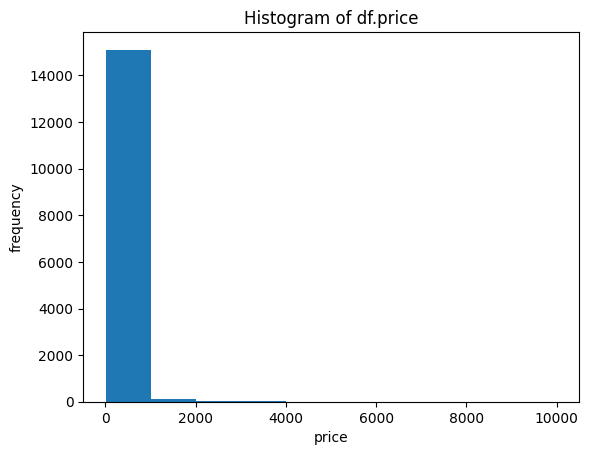

In [3]:
# Czyszczenie danych - częste zajęcie ;)
df['price'] = (
    df['price']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

plt.hist(df['price'])
plt.xlabel("price")
plt.ylabel("frequency")
plt.title("Histogram of df.price")
plt.show()

Mało widać, więc dodajmy kubełków i zawęźmy zakres osi x.

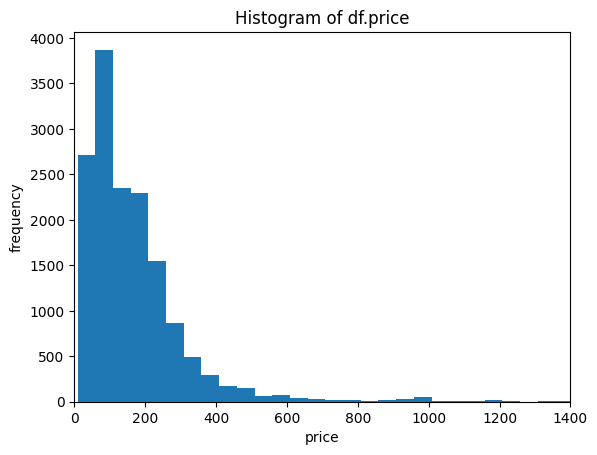

In [ ]:
plt.hist(df['price'], bins=200)
plt.xlim(0, 1400)
plt.xlabel("price")
plt.ylabel("frequency")
plt.title("Histogram of df.price")
plt.show()


## Wykres słupkowy (bar chart)

Wykres słupkowy prezentuje liczność kategorii w danych. Każdy słupek reprezentuje jedną kategorię i pokazuje, ile obserwacji do niej należy.

Przydatny przy analizie zmiennych kategorycznych, np.:



*   room_type — ile jest „Entire home/apt”, „Private room”, itd.
*   neighbourhood_cleansed — ile ofert w każdej dzielnicy


Wykres słupkowy odpowiada na pytania typu:

„Jakie typy ofert są najpopularniejsze?”

„Która dzielnica ma najwięcej mieszkań na Airbnb?”

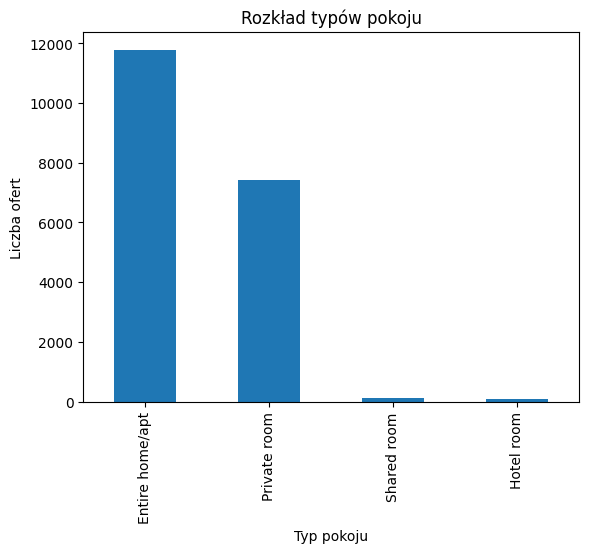

In [ ]:
counts = df['room_type'].value_counts()
counts.plot(kind='bar')
plt.xlabel('Typ pokoju')
plt.ylabel('Liczba ofert')
plt.title('Rozkład typów pokoju')
plt.show()

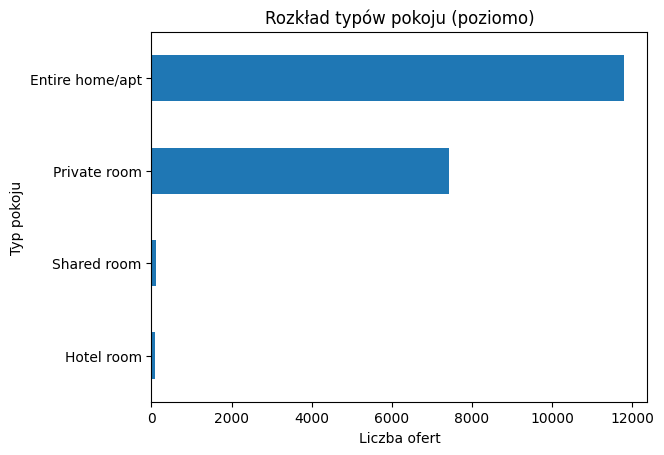

In [ ]:
counts.sort_values().plot(kind='barh')
plt.xlabel('Liczba ofert')
plt.ylabel('Typ pokoju')
plt.title('Rozkład typów pokoju (poziomo)')
plt.show()


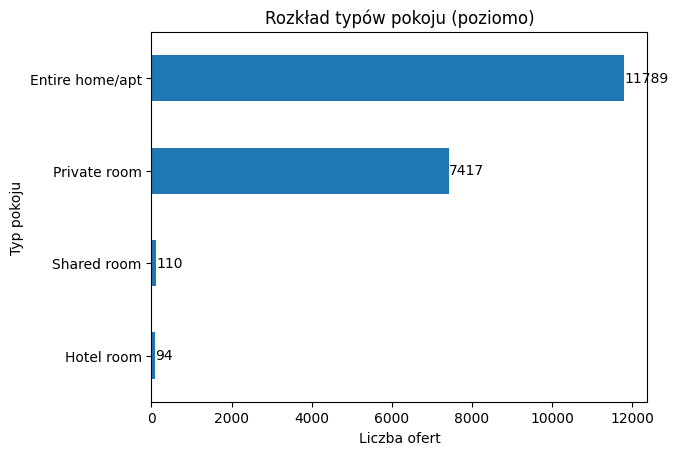

In [ ]:
counts = df['room_type'].value_counts().sort_values()

ax = counts.plot(kind='barh')
plt.xlabel('Liczba ofert')
plt.ylabel('Typ pokoju')
plt.title('Rozkład typów pokoju (poziomo)')
for i, value in enumerate(counts):
    ax.text(value + 5, i, str(value), va='center')
plt.show()


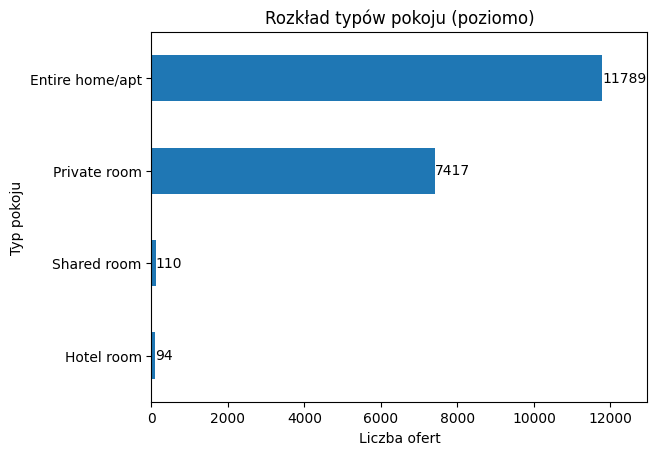

In [ ]:


counts = df['room_type'].value_counts().sort_values()

ax = counts.plot(kind='barh')
plt.xlabel('Liczba ofert')
plt.ylabel('Typ pokoju')
plt.title('Rozkład typów pokoju (poziomo)')

plt.xlim(0, counts.max() * 1.1)   # 10% padding

for i, value in enumerate(counts):
    ax.text(value + 5, i, str(value), va='center')
plt.show()


## More bar charts for other dimensions

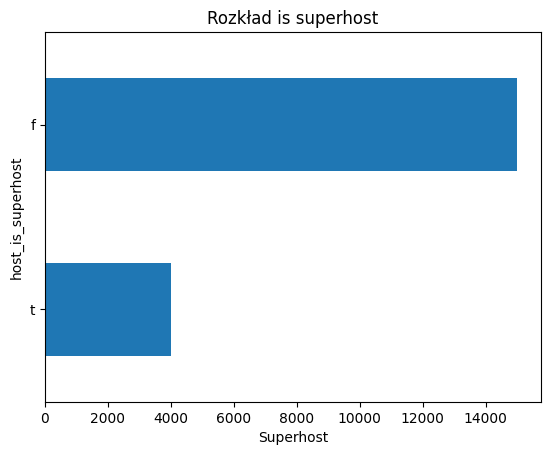

In [ ]:
counts = df['host_is_superhost'].value_counts()
counts.sort_values().plot(kind='barh')
plt.xlabel('Superhost')
plt.ylabel('host_is_superhost')
plt.title('Rozkład is superhost')
plt.show()

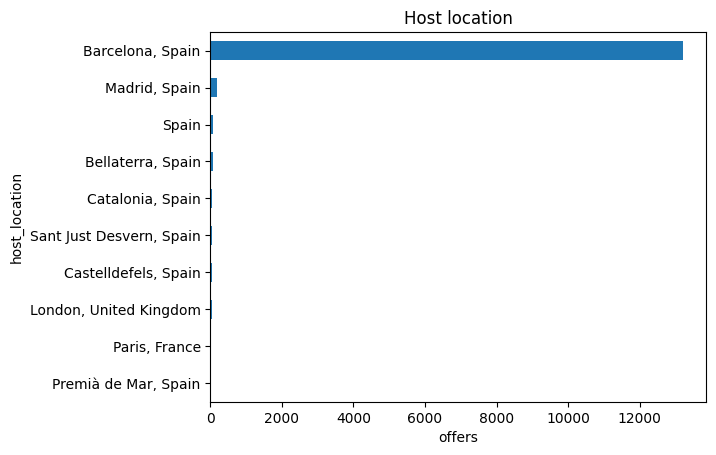

In [ ]:
counts = df['host_location'].value_counts()
top10 = counts.head(10)
top10.sort_values().plot(kind='barh')
plt.xlabel('offers')
plt.ylabel('host_location')
plt.title('Host location')
plt.show()

## Alternatywa - wykres kołowy

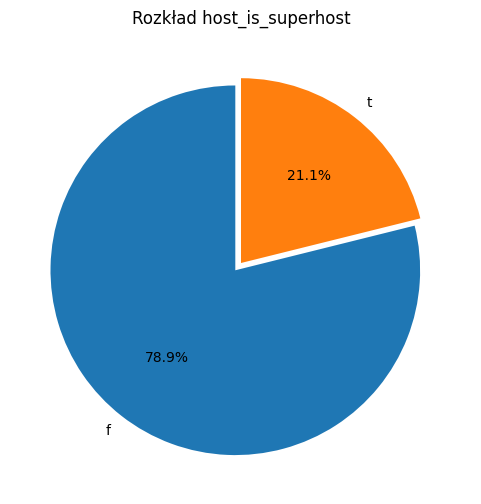

In [20]:
import matplotlib.pyplot as plt

# policzenie wartości
counts = df['host_is_superhost'].value_counts()

plt.figure(figsize=(6, 6))
counts.plot(
    kind='pie',
    autopct='%1.1f%%',        # procenty
    startangle=90,            # lepsze ustawienie
    explode=[0.05, 0]         # lekko „wyciągamy” jedną część (opcjonalne)
)

plt.title('Rozkład host_is_superhost')
plt.ylabel('')  # usuwa napis Y
plt.show()


## Line plot

In [23]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20250914152803,2025-09-15,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.62,4.82,4.32,ESFCTU000008058000039706000000000000000HUTB-00...,t,26,26,0,0,0.34
1,23197,https://www.airbnb.com/rooms/23197,20250914152803,2025-09-14,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,"Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,...,4.99,4.66,4.68,ESFCTU000008106000547162000000000000000000HUTB...,f,1,1,0,0,0.52
2,32711,https://www.airbnb.com/rooms/32711,20250914152803,2025-09-15,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,...,4.89,4.89,4.47,HUTB-001722,f,2,2,0,0,0.88
3,34241,https://www.airbnb.com/rooms/34241,20250914152803,2025-09-15,city scrape,Stylish Top Floor Apartment - Ramblas Plaza Real,Located in close proximity to Plaza Real and L...,NaN,https://a0.muscache.com/pictures/2437facc-2fe7...,73163,...,4.68,4.73,4.23,Exempt,f,3,3,0,0,0.14
4,34981,https://www.airbnb.com/rooms/34981,20250914152803,2025-09-15,city scrape,VIDRE HOME PLAZA REAL on LAS RAMBLAS,Spacious apartment for large families or group...,"Located in Ciutat Vella in the Gothic Quarter,...",https://a0.muscache.com/pictures/c4d1723c-e479...,73163,...,4.72,4.65,4.46,ESFCTU000008119000093652000000000000000HUTB-00...,f,3,3,0,0,1.49


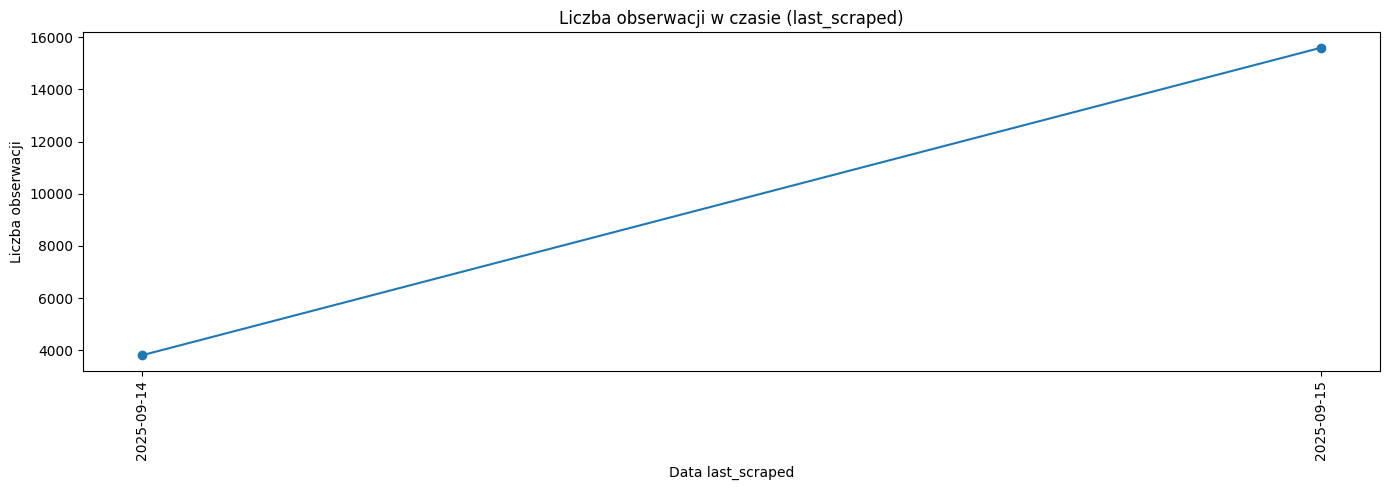

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Konwersja daty
df["last_scraped"] = pd.to_datetime(df["last_scraped"], errors="coerce")

# Grupowanie per dzień
daily_counts = df.groupby("last_scraped").size()

plt.figure(figsize=(14, 5))
plt.plot(daily_counts.index, daily_counts.values, marker='o')

# --- FORMATOWANIE DAT ---
ax = plt.gca()

# Format YYYY-MM-DD
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Jedna etykieta na dzień
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Obrót etykiet
plt.xticks(rotation=90)

plt.title("Liczba obserwacji w czasie (last_scraped)")
plt.xlabel("Data last_scraped")
plt.ylabel("Liczba obserwacji")
plt.tight_layout()
plt.show()


## Scatter plot

Scatter plot to wykres punktowy, na którym każda obserwacja (wiersz w danych) jest przedstawiona jako pojedyncza kropka.
Każda kropka ma dwa położenia:

oś X – wartość jednej zmiennej

oś Y – wartość drugiej zmiennej

Dzięki temu scatter plot pokazuje, jak dwie zmienne są ze sobą powiązane.

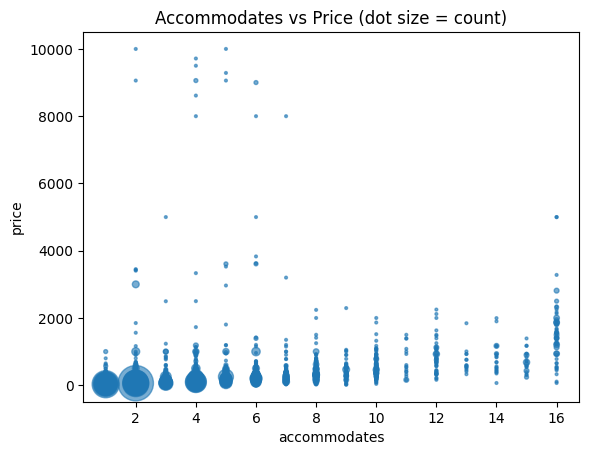

In [ ]:
import matplotlib.pyplot as plt

grouped = df.groupby(['accommodates', 'price']).size().reset_index(name='count')

plt.scatter(
    grouped['accommodates'],
    grouped['price'],
    s=grouped['count']*4,
    alpha=0.6
)

plt.xlabel('accommodates')
plt.ylabel('price')
plt.title('Accommodates vs Price (dot size = count)')
plt.show()


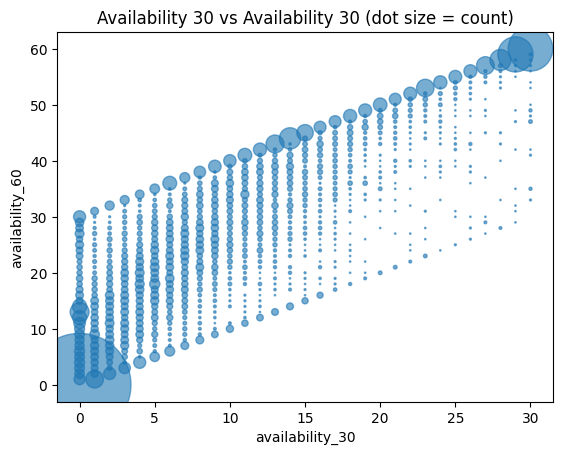

In [ ]:
import matplotlib.pyplot as plt

grouped = df.groupby(['availability_30', 'availability_60']).size().reset_index(name='count')

plt.scatter(
    grouped['availability_30'],
    grouped['availability_60'],
    s=grouped['count'],
    alpha=0.6
)

plt.xlabel('availability_30')
plt.ylabel('availability_60')
plt.title('Availability 30 vs Availability 30 (dot size = count)')
plt.show()


## Scatter plot, ale na mapie

In [ ]:
import folium

# Calculate the mean latitude and longitude to center the map
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()

# Create a folium map centered at the average coordinates
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add a marker for each listing
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,  # Small radius for individual points
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=row['name'] # Show listing name on click
    ).add_to(m)

#m

In [19]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# Create a list of unique neighborhood categories
neighborhoods = df['neighbourhood_cleansed'].unique()

# Generate a color map
colormap = cm.get_cmap('tab20', len(neighborhoods))   # up to 20 distinct colors
color_norm = colors.Normalize(vmin=0, vmax=len(neighborhoods)-1)

# Map each neighborhood to a hex color
neigh_to_color = {
    n: colors.to_hex(colormap(color_norm(i)))
    for i, n in enumerate(neighborhoods)
}

# Center map
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add points
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=neigh_to_color[row['neighbourhood_cleansed']],
        fill=True,
        fill_color=neigh_to_color[row['neighbourhood_cleansed']],
        fill_opacity=0.6,
        popup=(
            f"{row['name']}<br>"
            f"Neighborhood: {row['neighbourhood_cleansed']}"
        )
    ).add_to(m)

#m

/tmp/ipython-input-222065833.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab20', len(neighborhoods))   # up to 20 distinct colors


## Box ploty

Boxplot (wykres pudełkowy) to popularna metoda wizualizacji rozkładu danych liczbowych.
Pozwala w szybki sposób ocenić:

poziom typowych wartości (np. mediany),

zakres zmienności danych,

obecność wartości odstających (outliers),

porównać rozkład między wieloma grupami.

Dlatego świetnie sprawdza się w analizie cen, m.in. aby zobaczyć, jak różnią się między sobą poszczególne dzielnice.


Mediana oraz 1. i 3. kwartyle.


Wąsy Pokazują zakres większości danych, zwykle definiowany jako:

dolny wąs: Q1 – 1.5 × IQR

górny wąs: Q3 + 1.5 × IQR


In [7]:
df[['price']].head()

,price
0,210.0
1,285.0
2,170.0
3,110.0
4,333.0


In [8]:
df["price"].describe()

,price
count,15276.000000
mean,187.312713
std,363.967170
min,9.000000
25%,70.000000
50%,131.000000
75%,215.000000
max,10000.000000


/tmp/ipython-input-1283800209.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


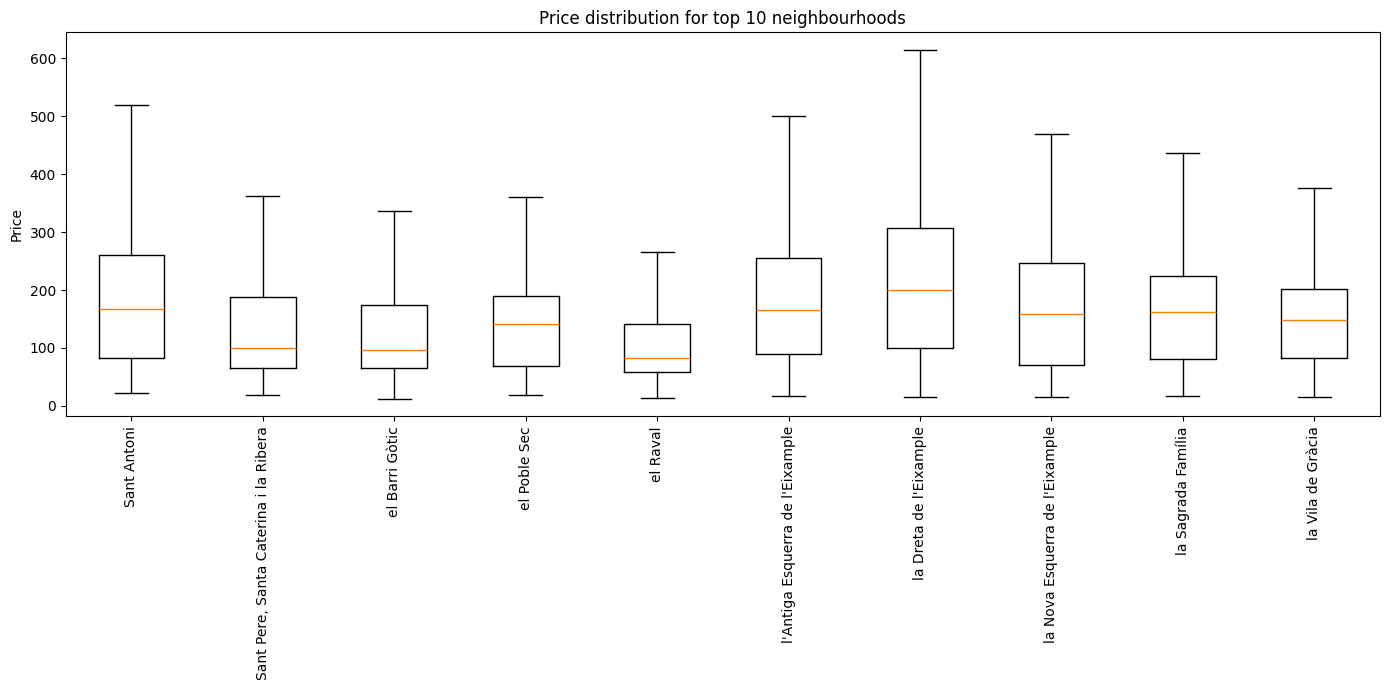

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Wczytaj dane (zmień na swój plik lub komórkę) ---
# df = pd.read_csv("twoj_plik.csv")
# ... lub jeśli masz już df, pomiń tę linię

# --- 2. Upewniamy się, że price to float ---
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# --- 3. Wybieramy top10 dzielnic ---
top10_neigh = df["neighbourhood_cleansed"].value_counts().head(10).index

df_top10 = df[df["neighbourhood_cleansed"].isin(top10_neigh)]

# --- 4. Grupujemy poprawnie (groupby) ---
groups = []
labels = []

for name, group in df_top10.groupby("neighbourhood_cleansed"):
    groups.append(group["price"].dropna().values)
    labels.append(name)

# --- 5. Rysujemy ---
plt.figure(figsize=(14, 7))
plt.boxplot(groups, labels=labels, showfliers=False)
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.title("Price distribution for top 10 neighbourhoods")
plt.tight_layout()
plt.show()


/tmp/ipython-input-3097942552.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


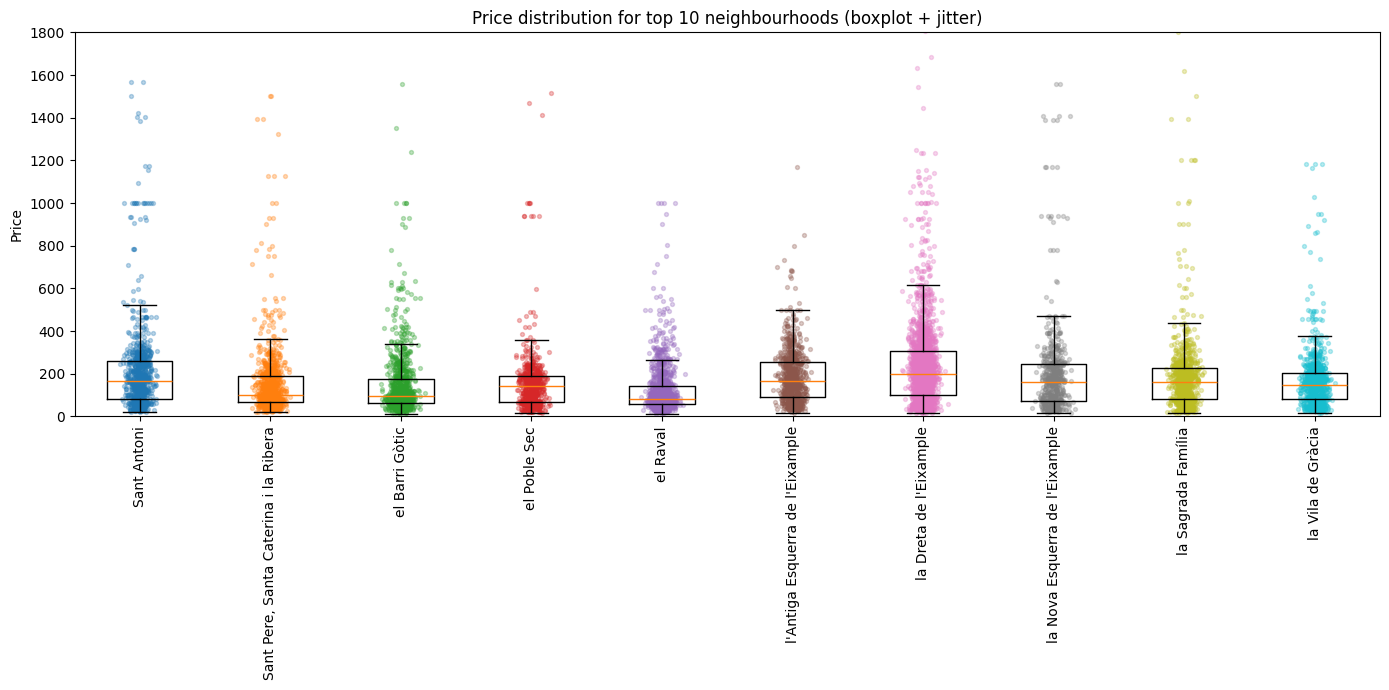

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Przygotowanie danych (bazuje na poprzednim kodzie)
top10_neigh = df["neighbourhood_cleansed"].value_counts().head(10).index
df_top10 = df[df["neighbourhood_cleansed"].isin(top10_neigh)]

groups = []
labels = []

for name, group in df_top10.groupby("neighbourhood_cleansed"):
    groups.append(group["price"].dropna().values)
    labels.append(name)

plt.figure(figsize=(14, 7))

# --- BOX PLOT ---
plt.boxplot(groups, labels=labels, showfliers=False)

# --- JITTER PLOT ---
for i, data in enumerate(groups):
    x = np.random.normal(loc=i+1, scale=0.05, size=len(data))  # jitter wokół pozycji i+1
    plt.scatter(x, data, s=8, alpha=0.3)                       # małe półprzezroczyste kropki

plt.xticks(rotation=90)
plt.ylabel("Price")
plt.ylim(0, 1800)
plt.title("Price distribution for top 10 neighbourhoods (boxplot + jitter)")
plt.tight_layout()
plt.show()


## Amenities - wymagają przetworzenia. Dimensionality reduction

In [ ]:
df['amenities'].iloc[0]

In [6]:
type(df['amenities'].iloc[0])

str

In [7]:
import ast

df["amenities_list"] = df["amenities"].apply(ast.literal_eval)

df["amenities_list"] = df["amenities"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else []
)


In [8]:
df['amenities'].iloc[0]

'["Pets allowed", "30 inch TV", "Coffee maker", "Elevator", "Host greets you", "Pack \\u2019n play/Travel crib", "Heating", "Hangers", "AC - split type ductless system", "Iron", "Crib", "Dishes and silverware", "Private patio or balcony", "Kitchen", "Essentials", "Free washer \\u2013 In unit", "Wifi", "Hot water", "City skyline view", "Shampoo", "Hair dryer", "Refrigerator"]'

In [9]:
amenity_counts = (
    df["amenities_list"]
    .explode()
    .value_counts()
)
print(amenity_counts)


amenities_list
Wifi                                                                                       18038
Kitchen                                                                                    17386
Hot water                                                                                  14492
Hair dryer                                                                                 14023
Hangers                                                                                    13814
                                                                                           ...  
Co.Bigelow Lavanda body soap                                                                   1
Co.Bigelow Lavanda shampoo                                                                     1
Fast wifi – 216 Mbps                                                                           1
Fast wifi – 144 Mbps                                                                           1
Shared outdoor 

Nierealne byłoby stworzenie 3k kolumn tylko dla amenities - w tym tak rzadkich jak Fast wifi - 144Mbps

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
amenities_matrix = mlb.fit_transform(df["amenities_list"])


In [17]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5, random_state=42)
amenities_reduced = svd.fit_transform(amenities_matrix)
amenities_reduced

array([[ 2.89800477,  0.43046699, -0.6085007 , -1.33879058, -1.1401716 ],
       [ 4.97261782, -2.53935044, -0.17282955,  0.27336969, -0.41513869],
       [ 4.57585048,  0.34426153, -0.59888357, -1.78276062, -0.69997827],
       ...,
       [ 3.60946398,  0.73446992,  1.48932162,  0.39070373,  0.54816976],
       [ 3.96034879,  0.59589872,  1.1402635 , -0.22769142,  0.91609162],
       [ 4.36708562, -0.63792726, -0.50155752,  1.23938122, -0.36820752]])

Text(0, 0.5, 'cumulative explained variance')

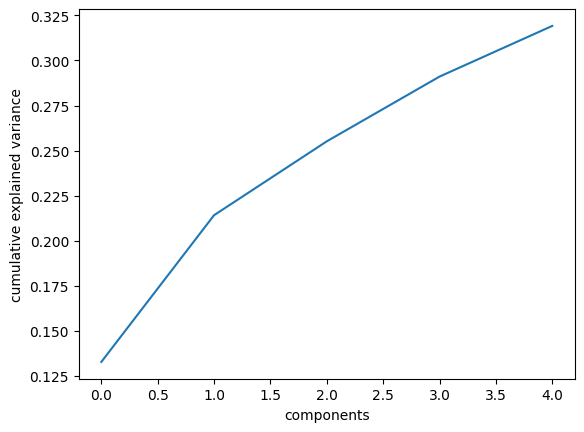

In [18]:
import matplotlib.pyplot as plt

plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel("components")
plt.ylabel("cumulative explained variance")


In [19]:
loadings = svd.components_
top_idx = loadings[0].argsort()[::-1][:20]
top_amenities = [mlb.classes_[i] for i in top_idx]
print(top_amenities)


['Kitchen', 'Wifi', 'Hot water', 'Hair dryer', 'Hangers', 'Iron', 'Dishes and silverware', 'Bed linens', 'Essentials', 'Refrigerator', 'Microwave', 'Cooking basics', 'Heating', 'TV', 'Washer', 'Elevator', 'Air conditioning', 'Oven', 'Hot water kettle', 'Coffee maker']


In [20]:
for i in range(5):
    df[f"amenity_comp_{i+1}"] = amenities_reduced[:, i]


## Brainstorm - dyskusja

- Jakie zmienne mogłyby pomóc lepiej zrozumieć nam cenę?
